In [783]:
# Importing the dataset

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [784]:
# Importing the dataset

df = pd.read_csv('heart_disease.csv')

In [785]:
df.head()

,28,1,2,130,132,0,2.1,185,0.1,0.2,?,?.1,?.2,0.3
0,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
1,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
2,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
3,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
4,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0


In [786]:
# Column names are not given so using the provided link giving the heading for columns

colnames=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [787]:
# Importing again using the column names

df = pd.read_csv('heart_disease.csv',names=colnames)

In [788]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [789]:
# Checking the shape of the dataset

df.shape

(294, 14)

In [790]:
# From the link provided 'num' is the attribute we have to predict

In [791]:
temp1 = pd.DataFrame(df.chol.str.isdigit())   # Checking for ? in chol attribute 

In [792]:
temp1.head()

,chol
0,True
1,True
2,False
3,True
4,True


In [793]:
temp1[temp1['chol']==False]

,chol
2,False
31,False
34,False
44,False
65,False
72,False
75,False
86,False
91,False
97,False


In [794]:
temp2 = pd.DataFrame(df.slope.str.isdigit()) 

In [795]:
temp2.shape

(294, 1)

In [796]:
temp3 = pd.DataFrame(df.ca.str.isdigit()) 

In [797]:
temp3.shape

(294, 1)

In [798]:
temp4 = pd.DataFrame(df.thal.str.isdigit()) 

In [799]:
temp4.shape

(294, 1)

In [800]:
## Slope, ca, thal has all the values as ? so omitting those columns

df = df.drop(['slope','ca','thal'],axis=1)

In [801]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,?,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [802]:
df = df.replace('?',np.nan)       # Replacing all the other null values as np.nan

In [803]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
2,29,1,2,140,NaN,0,0,170,0,0.0,0
27,38,0,2,120,275,NaN,0,129,0,0.0,0
31,39,1,2,120,NaN,0,1,146,0,2.0,0
34,39,1,2,130,NaN,0,0,120,0,0.0,0
44,40,1,3,140,NaN,0,0,188,0,0.0,0
65,43,0,3,150,NaN,0,0,175,0,0.0,0
72,45,0,2,180,NaN,0,0,180,0,0.0,0
75,45,1,3,135,NaN,0,0,110,0,0.0,0
81,46,1,3,150,163,NaN,0,116,0,0.0,0
86,47,0,3,130,NaN,0,0,145,0,2.0,0


In [804]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
num          0
dtype: int64

In [805]:
a = df['chol'].median()     # Checking median for chol field

In [806]:
df["chol"].fillna(df["chol"].median(),inplace = True)   # Filling median for chol field

In [807]:
df["trestbps"].fillna(df["trestbps"].median(),inplace = True) # Filling median for trestbps

In [808]:
df["thalach"].fillna(df["thalach"].median(),inplace = True) # Filling mode for thalach field

In [809]:
df['fbs'].mode()

0    0
dtype: object

In [810]:
df["fbs"].fillna(0,inplace = True)      # Filling mode for fbs

In [811]:
df['restecg'].mode()

0    0
dtype: object

In [812]:
df["restecg"].fillna(0,inplace = True)  # Filling mode for restecg

In [813]:
df['exang'].mode()

0    0
dtype: object

In [814]:
df["exang"].fillna(0,inplace = True)    # Filling mode for exang

In [815]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num


In [816]:
df.isnull().sum()                       # Removed all the null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
dtype: int64

In [817]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,243,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [818]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
num           int64
dtype: object

In [819]:
## Converting all the object columns to int

In [820]:
df['trestbps'].dtype

dtype('O')

In [821]:
df['trestbps']=df['trestbps'].astype('int')     

In [822]:
df['chol'].dtype

dtype('O')

In [823]:
df['chol']=df['chol'].astype('int')             

In [824]:
df['fbs'].dtype

dtype('O')

In [825]:
df['fbs']=df['fbs'].astype('int')

In [826]:
df['restecg'].dtype

dtype('O')

In [827]:
df['restecg']=df['restecg'].astype('int')

In [828]:
df['thalach'].dtype

dtype('O')

In [829]:
df['thalach']=df['thalach'].astype('int')

In [830]:
df['oldpeak'].dtype

dtype('float64')

In [831]:
df['oldpeak']=df['oldpeak'].astype('int')

In [832]:
df['exang'].dtype

dtype('O')

In [833]:
df['exang']=df['exang'].astype('int')

In [834]:
df.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
num         int64
dtype: object

## Basic EDA

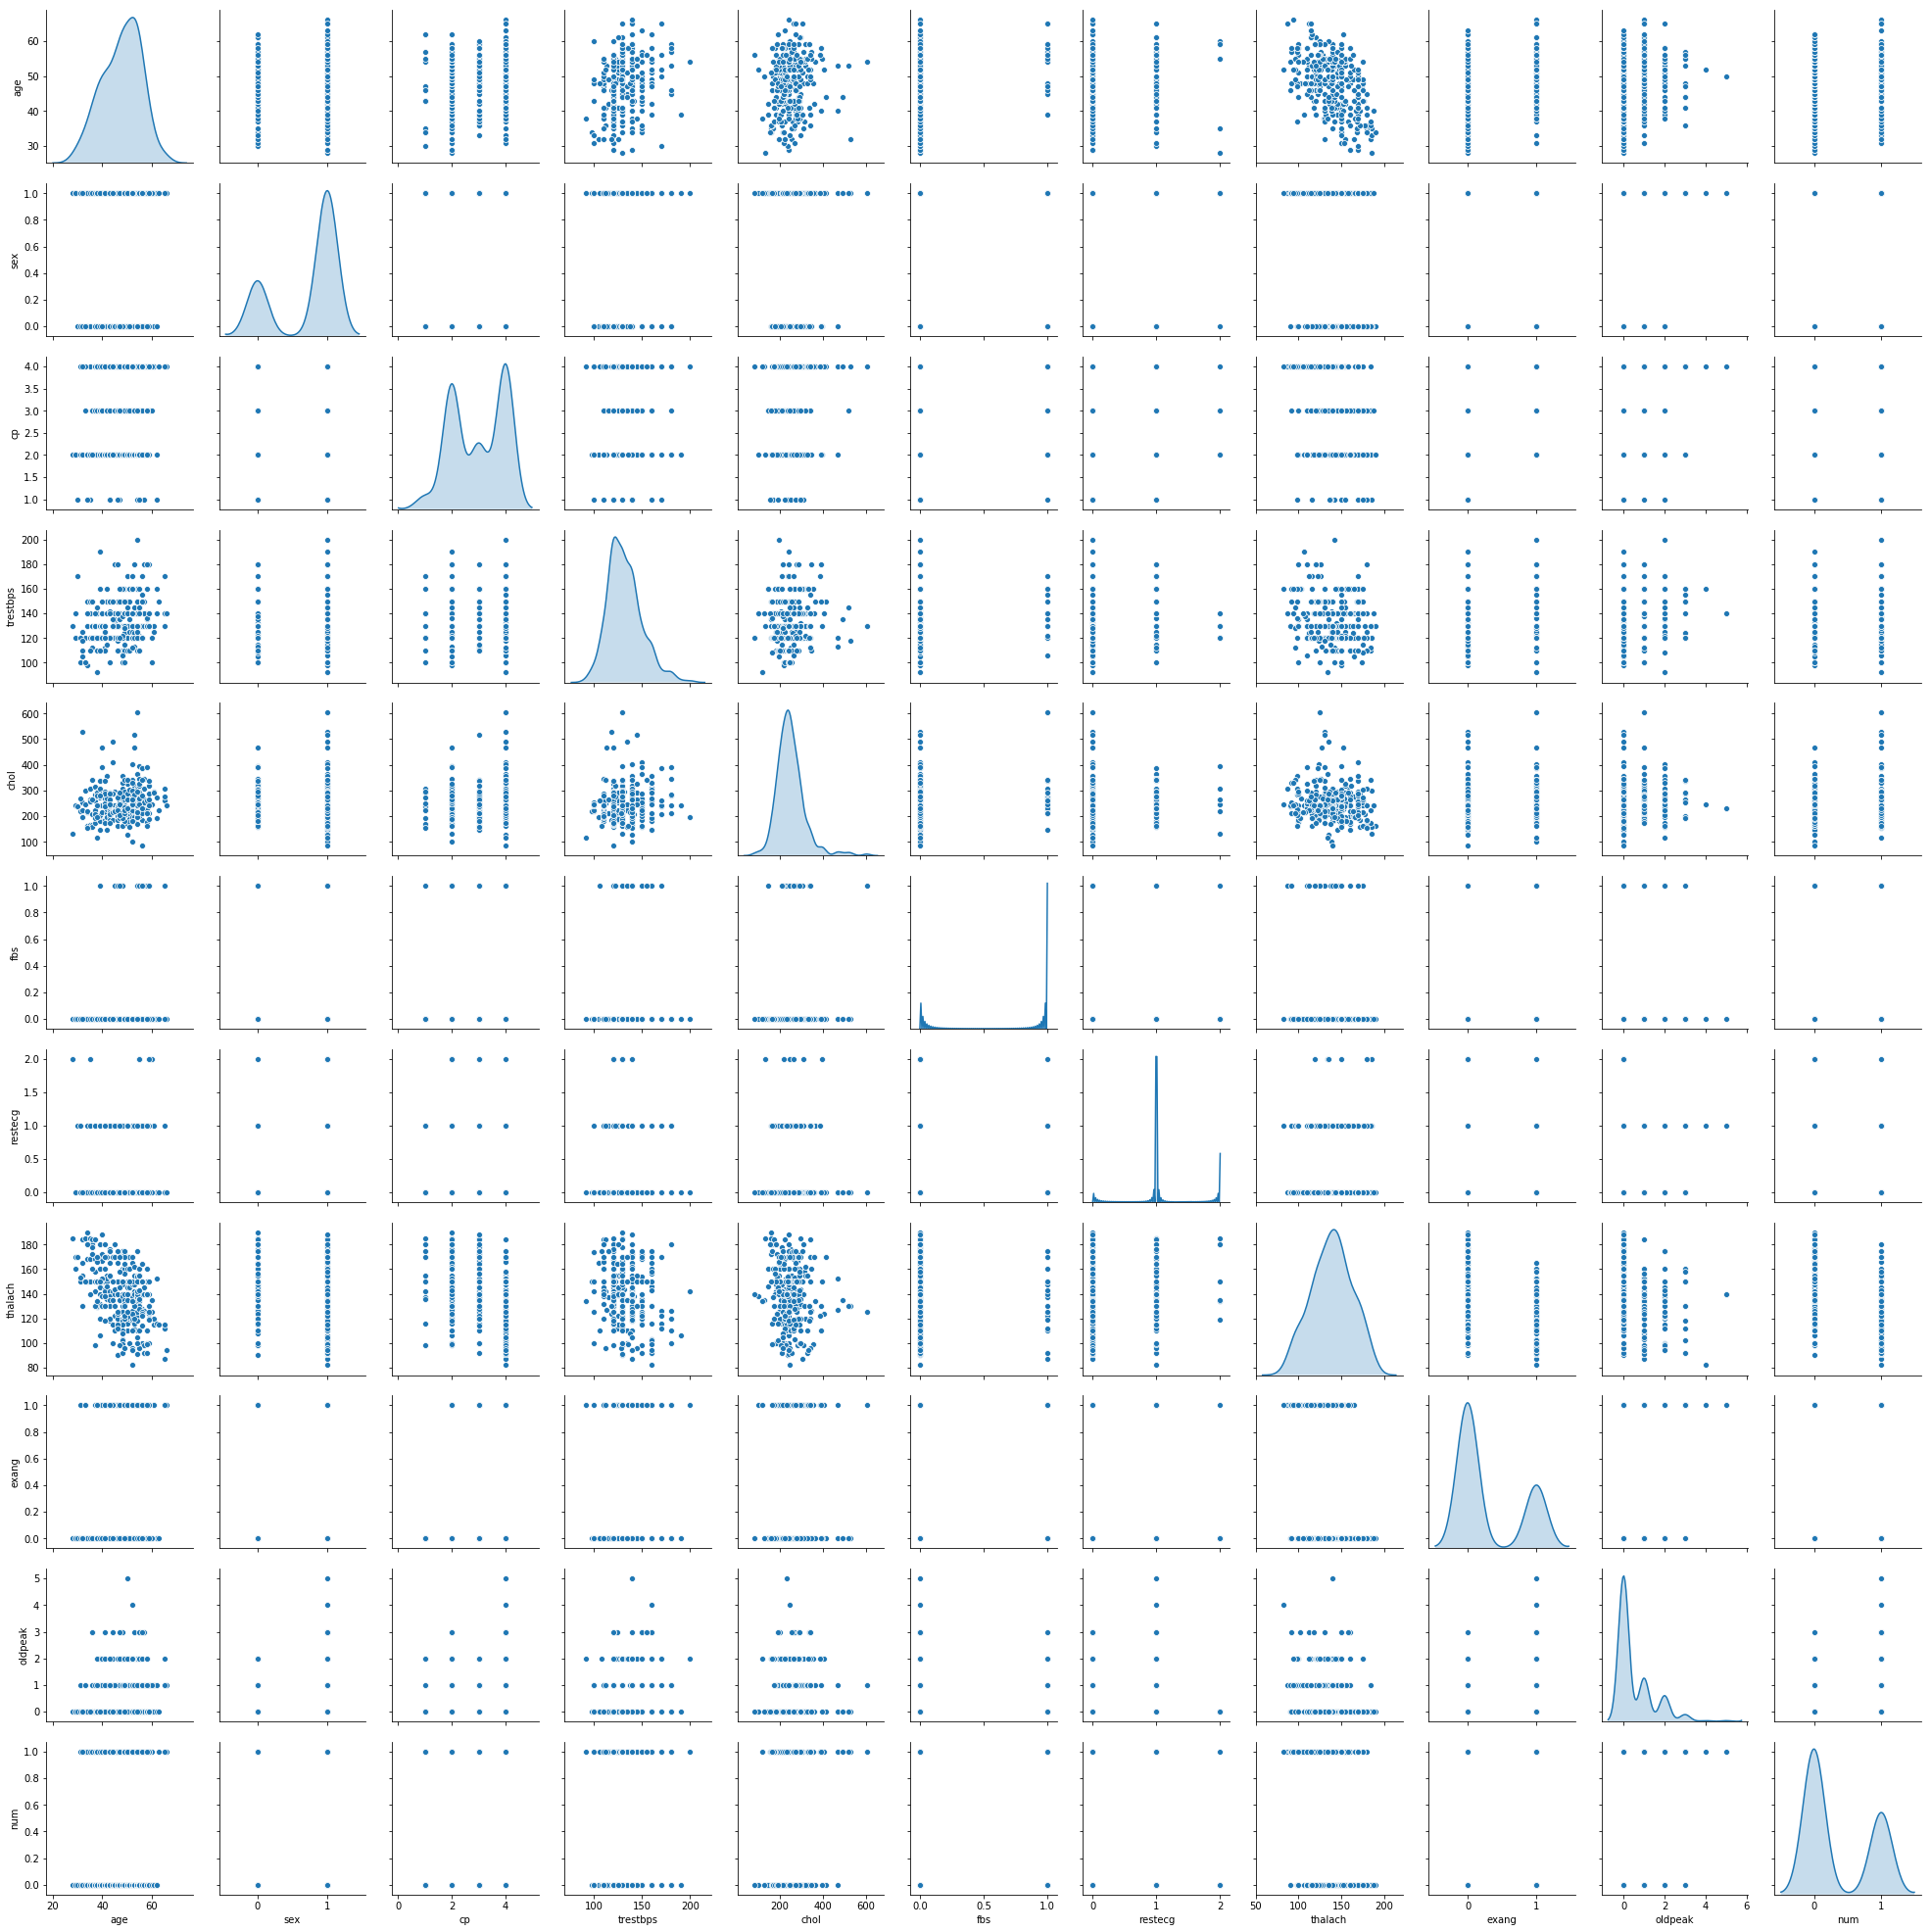

In [835]:
sns.pairplot(data=df,diag_kind = 'kde')

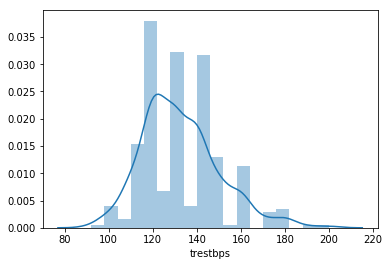

In [836]:
sns.distplot(df['trestbps'],kde=True)

From the above plot we can understand that trestbps column is a slight right skewed distribution.

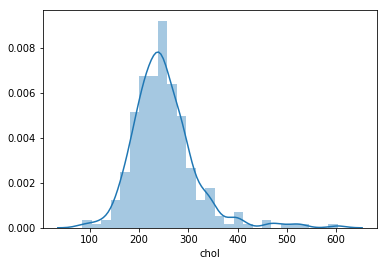

In [837]:
sns.distplot(df['chol'],kde=True)

From the above plot we can understand that chol column is a right skewed distribution.

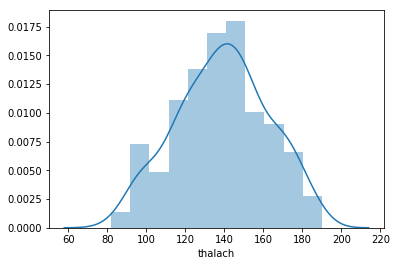

In [838]:
sns.distplot(df['thalach'],kde=True)

From the above plot we can understand that thalach column is a normally distributed.

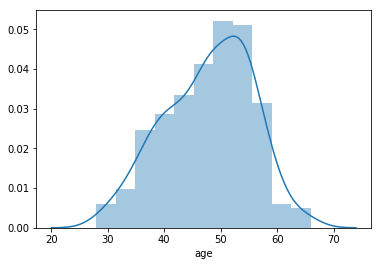

In [839]:
sns.distplot(df['age'],kde=True)

We can say that age field is slightly left skewed since the population is mostyl towards right side and there are few people who are outliers on left side.

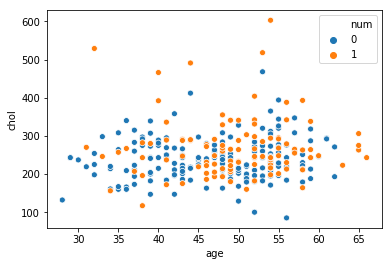

In [840]:
sns.scatterplot(x=df['age'],y=df['chol'],hue=df['num'])

From the above plot we can understand that even people of all age is having cholestrol and also having heart diesease also

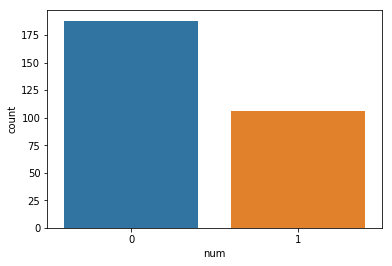

In [841]:
sns.countplot(x=df['num'])

In [842]:
df.groupby(['num'])['num'].count()       # Number of people having heart disease and not

num
0    188
1    106
Name: num, dtype: int64

## Over Sampling

#### Since the number of people not having heart disease if high while compared to having heart disease. and also we have less number of records so that we are going to use a method called smote to over sample the model.

In [843]:
from imblearn.over_sampling import SMOTE

In [844]:
x = df.drop('num', axis=1)
y = df.num

In [845]:
sm = SMOTE(random_state=1)

In [846]:
x_os, y_os = sm.fit_sample(x,y)

In [847]:
x_os.shape

(376, 10)

### Splitting the data into train, validation and test

In [848]:
from sklearn.model_selection import train_test_split

In [849]:
x_train1,x_test,y_train1,y_test = train_test_split(x_os,y_os,test_size=0.3,random_state=1)

In [850]:
x_train,x_val,y_train,y_val = train_test_split(x_train1,y_train1,test_size=0.3,random_state=1)

## Logistic Regression

In [851]:
lr_model = LogisticRegression()

In [852]:
lr_model.fit(x_train,y_train)       # Fitting the model using train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [853]:
lr_model.predict(x_val)             # Predicting for x_val 

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [854]:
lr_model.predict(x_test)            # Predicting for main test set

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0])

In [855]:
logreg.score(x_val,y_val)         # Calculating score for validation set

0.759493670886076

In [856]:
logreg.score(x_test,y_test)       # Calculating score for test set

0.7610619469026548

## DecisionTree

In [857]:
dt_model = DecisionTreeClassifier()

In [858]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [859]:
dt_model.predict(x_val)

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [860]:
dt_model.predict(x_test)

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0])

In [861]:
dt_model.score(x_val,y_val) 

0.6835443037974683

In [862]:
dt_model.score(x_test,y_test) 

0.6017699115044248

## KNN

In [863]:
kn_model = KNeighborsClassifier()

In [864]:
kn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [865]:
kn_model.predict(x_val)

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [866]:
kn_model.predict(x_test)

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0])

In [867]:
kn_model.score(x_val,y_val)

0.620253164556962

In [868]:
kn_model.score(x_test,y_test)

0.5929203539823009

## Naive Bayes

In [869]:
nb_model = GaussianNB()

In [870]:
nb_model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [871]:
nb_model.predict(x_val)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [872]:
nb_model.predict(x_test)

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0])

In [873]:
nb_model.score(x_val,y_val)

0.7721518987341772

In [874]:
nb_model.score(x_test,y_test)

0.7345132743362832

## Bootstrap Sampling

In [875]:
from sklearn.utils import resample

In [876]:
x_os = pd.DataFrame(x_os, columns=x.columns)
y_os = pd.DataFrame(y_os, columns=['num'])

In [877]:
numos=pd.concat([x_os,y_os],axis=1)

In [878]:
numos.shape

(376, 11)

In [879]:
numos.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0,0
1,29,1,2,120,243,0,0,160,0,0,0
2,29,1,2,140,243,0,0,170,0,0,0
3,30,0,1,170,237,0,1,170,0,0,0
4,31,0,2,100,219,0,1,150,0,0,0


In [880]:
iterations = 100

values= df.values

lrstats = []
dtstats = []
nbstats = []
knstats = []

for i in range(iterations):
    train = resample(values,n_samples=376)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
     
    dt_model = DecisionTreeClassifier()
    dt_model.fit(train[:,:-1] ,train[:,-1])
    dtscore = dt_model.score(test[:,:-1],test[:,-1])
    dtstats.append(dtscore)
    
    lr_mode = LogisticRegression()
    lr_model.fit(train[:,:-1] ,train[:,-1])
    lrscore = lr_model.score(test[:,:-1],test[:,-1])
    lrstats.append(lrscore)
    
    kn_model = KNeighborsClassifier()
    kn_model.fit(train[:,:-1] ,train[:,-1])
    knscore = kn_model.score(test[:,:-1],test[:,-1])
    knstats.append(knscore)
    
    nb_model = GaussianNB()
    nb_model.fit(train[:,:-1] ,train[:,-1])
    nbscore = nb_model.score(test[:,:-1],test[:,-1])
    nbstats.append(nbscore)

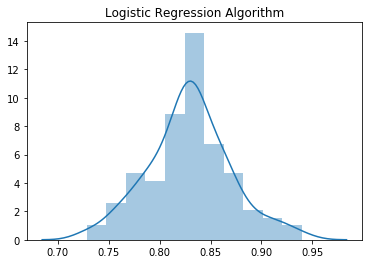

The  95 % confidence interval is:  75.32 % to  91.42 %


In [881]:
sns.distplot(lrstats)
plt.title('Logistic Regression Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(lrstats,lower),4)*100,
      '% to ',round(np.percentile(lrstats,upper),4)*100,'%')

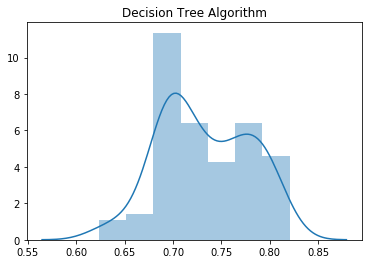

The  95 % confidence interval is:  64.7 % to  81.01 %


In [882]:
sns.distplot(dtstats)
plt.title('Decision Tree Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(dtstats,lower),4)*100,
      '% to ',round(np.percentile(dtstats,upper),4)*100,'%')

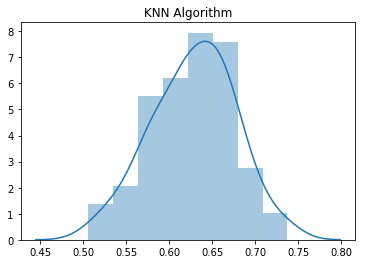

The  95 % confidence interval is:  53.080000000000005 % to  71.71 %


In [883]:
sns.distplot(knstats)
plt.title('KNN Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(knstats,lower),4)*100,
      '% to ',round(np.percentile(knstats,upper),4)*100,'%')

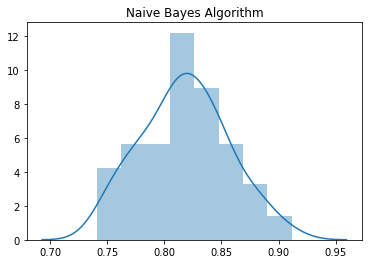

The  95 % confidence interval is:  75.0 % to  88.9 %


In [884]:
sns.distplot(nbstats)
plt.title('Naive Bayes Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(nbstats,lower),4)*100,
      '% to ',round(np.percentile(nbstats,upper),4)*100,'%')

In [885]:
print('The ',confidence, '% confidence interval of Logistic Regression is: ',round(np.percentile(lrstats,lower),4)*100,
      '% to ',round(np.percentile(lrstats,upper),4)*100,'%')

print('The ',confidence, '% confidence interval of DesicionTree is       : ',round(np.percentile(dtstats,lower)*100,2),
      '% to ',round(np.percentile(knstats,upper)*100,2),'%')

print('The ',confidence, '% confidence interval of KNN is                : ',round(np.percentile(knstats,lower)*100,2),
      '% to ',round(np.percentile(knstats,upper),4)*100,'%')

print('The ',confidence, '% confidence interval of Naive Bayes is        : ',round(np.percentile(nbstats,lower),4)*100,
      '% to ',round(np.percentile(nbstats,upper),4)*100,'%')

The  95 % confidence interval of Logistic Regression is:  75.32 % to  91.42 %
The  95 % confidence interval of DesicionTree is       :  64.7 % to  71.71 %
The  95 % confidence interval of KNN is                :  53.08 % to  71.71 %
The  95 % confidence interval of Naive Bayes is        :  75.0 % to  88.9 %


### Logistic Regression is giving out the highest accuracy with confidence interval of 78.66% to 89.52%. 

Logistic    : 0.772109 (0.126538)
DecisionTree: 0.557823 (0.223301)
KNN         : 0.506803 (0.234571)
Naive Bayes : 0.809524 (0.100210)


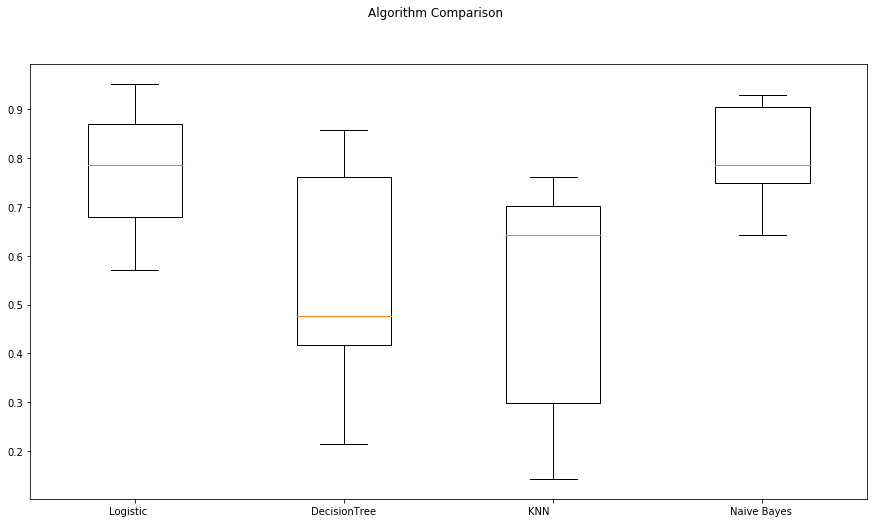

In [886]:
from sklearn import model_selection

models=[]

models.append(('Logistic    ',lr_model))
models.append(('DecisionTree',dt_model))
models.append(('KNN         ',kn_model))
models.append(('Naive Bayes ',nb_model))

results=[]
names=[]

scoring='accuracy'

for name,model in models:
    kfold=model_selection.KFold(n_splits=7,random_state=2)
    cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig=plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### After crossvalidation Naive Bayes is giving out the highest accuracy with less variance while compared to logistic Regression

## Using ensemble methods

In [887]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

### Bagging

In [888]:
bg_model = BaggingClassifier(oob_score=True)

In [889]:
bg_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=True, random_state=None,
         verbose=0, warm_start=False)

In [890]:
bg_model.predict(x_val)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [891]:
bg_model.predict(x_test)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0])

In [892]:
print(bg_model.score(x_val,y_val))
print(bg_model.score(x_test,y_test))

0.7215189873417721
0.6902654867256637


In [893]:
bg_model.oob_score_

0.7608695652173914

### AdaBoosting

In [894]:
ad_model = AdaBoostClassifier()

In [895]:
ad_model.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [896]:
ad_model.predict(x_val)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [897]:
ad_model.predict(x_test)

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [898]:
ad_model.score(x_val,y_val)

0.7974683544303798

In [899]:
ad_model.score(x_test,y_test)

0.7433628318584071

### Gradient Boosting

In [900]:
gb_model = GradientBoostingClassifier()

In [901]:
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [902]:
gb_model.predict(x_val)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [903]:
gb_model.predict(x_test)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0])

In [904]:
print(gb_model.score(x_val,y_val))
print(gb_model.score(x_test,y_test))

0.7848101265822784
0.7522123893805309


### RandomForest

In [905]:
rf_model = RandomForestClassifier(oob_score=True)

In [906]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [907]:
rf_model.predict(x_val)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [908]:
rf_model.predict(x_test)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0])

In [909]:
rf_model.score(x_test,y_test)

0.7345132743362832

In [910]:
rf_model.oob_score_

0.7934782608695652

### Bootstrap Sampling using ensemble methods

In [911]:
## Using randomcv finding out the best n_estimators for bagging

In [912]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

param = {'n_estimators': sp_randint(1,100)}

In [913]:
randomcv = RandomizedSearchCV(estimator=bg_model, param_distributions= param, cv=5,n_iter=100)

In [914]:
randomcv.fit(x_os,y_os)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=True, random_state=None,
         verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a3c83af98>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [915]:
randomcv.best_params_

{'n_estimators': 14}

In [916]:
iterations = 100

values = numos.values

gbstats = []
rfstats = []
bgstats = []
adstats = []

for i in range(iterations):
    train = resample(values,n_samples=376)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    
    gb_model = GradientBoostingClassifier()
    gb_model.fit(train[:,:-1] ,train[:,-1])
    gbscore = gb_model.score(test[:,:-1],test[:,-1])
    gbstats.append(gbscore)
    
    ad_model = AdaBoostClassifier()
    ad_model.fit(train[:,:-1] ,train[:,-1])
    adscore = ad_model.score(test[:,:-1],test[:,-1])
    adstats.append(adscore)
     
    rf_model = RandomForestClassifier()
    rf_model.fit(train[:,:-1] ,train[:,-1])
    rfscore = rf_model.score(test[:,:-1],test[:,-1])
    rfstats.append(rfscore)
    
    bg_model = BaggingClassifier(n_estimators=28)
    bg_model.fit(train[:,:-1] ,train[:,-1])
    bgscore = bg_model.score(test[:,:-1],test[:,-1])
    bgstats.append(bgscore)

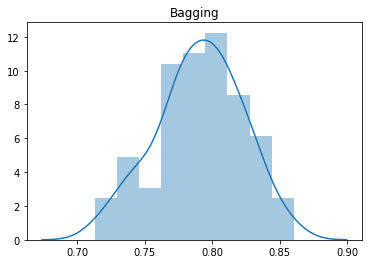

The  95 % confidence interval is:  72.38 % to  84.68 %


In [917]:
sns.distplot(bgstats)
plt.title('Bagging')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(bgstats,lower),4)*100,
      '% to ',round(np.percentile(bgstats,upper),4)*100,'%')

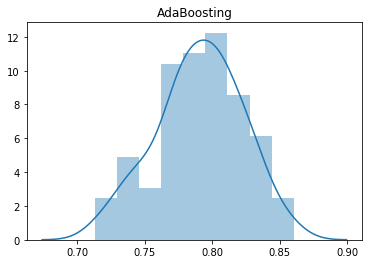

The  95 % confidence interval is:  73.16 % to  85.88 %


In [918]:
sns.distplot(bgstats)
plt.title('AdaBoosting')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(adstats,lower),4)*100,
      '% to ',round(np.percentile(adstats,upper),4)*100,'%')

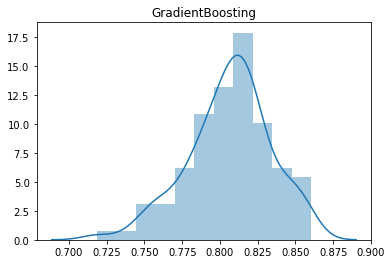

The  95 % confidence interval is:  75.01 % to  85.49 %


In [919]:
sns.distplot(gbstats)
plt.title('GradientBoosting')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(gbstats,lower),4)*100,
      '% to ',round(np.percentile(gbstats,upper),4)*100,'%')

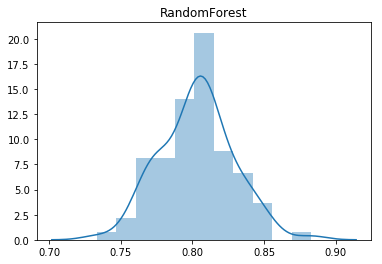

The  95 % confidence interval is:  75.85 % to  85.14 %


In [920]:
sns.distplot(rfstats)
plt.title('RandomForest')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(rfstats,lower),4)*100,
      '% to ',round(np.percentile(rfstats,upper),4)*100,'%')

In [921]:
print('The ',confidence, '% confidence interval of Logistic Regression is: ',round(np.percentile(lrstats,lower)*100,2),
      '% to ',round(np.percentile(lrstats,upper),4)*100,'%')

print('The ',confidence, '% confidence interval of DesicionTree is       : ',round(np.percentile(dtstats,lower)*100,2),
      '% to ',round(np.percentile(knstats,upper)*100,2),'%')

print('The ',confidence, '% confidence interval of KNN is                : ',round(np.percentile(knstats,lower)*100,2),
      '% to ',round(np.percentile(knstats,upper)*100,2),'%')

print('The ',confidence, '% confidence interval of Naive Bayes is        : ',round(np.percentile(nbstats,lower)*100,2),
      '% to ',round(np.percentile(nbstats,upper),4)*100,'%')

print('The ',confidence, '% confidence interval of Bagging is            : ',round(np.percentile(bgstats,lower)*100,2),
      '% to ',round(np.percentile(bgstats,upper)*100,2),'%')

print('The ',confidence, '% confidence interval of AdaBoosting is        : ',round(np.percentile(adstats,lower)*100,2),
      '% to ',round(np.percentile(adstats,upper)*100,2),'%')

print('The ',confidence, '% confidence interval of Gradient Boosting is  : ',round(np.percentile(gbstats,lower)*100,2),
      '% to ',round(np.percentile(gbstats,upper)*100,2),'%')

print('The ',confidence, '% confidence interval of RandomForest is       : ',round(np.percentile(rfstats,lower)*100,2),
      '% to ',round(np.percentile(rfstats,upper)*100,2),'%')

The  95 % confidence interval of Logistic Regression is:  75.32 % to  91.42 %
The  95 % confidence interval of DesicionTree is       :  64.7 % to  71.71 %
The  95 % confidence interval of KNN is                :  53.08 % to  71.71 %
The  95 % confidence interval of Naive Bayes is        :  75.0 % to  88.9 %
The  95 % confidence interval of Bagging is            :  72.38 % to  84.68 %
The  95 % confidence interval of AdaBoosting is        :  73.16 % to  85.88 %
The  95 % confidence interval of Gradient Boosting is  :  75.01 % to  85.49 %
The  95 % confidence interval of RandomForest is       :  75.85 % to  85.14 %


### Even after ensemble techniques logistic regression is giving out highest accuracy with a confidence interval of 75.32% to 91.42%

Logistic    : 0.798161 (0.137092)
DecisionTree: 0.612069 (0.190236)
KNN         : 0.578966 (0.210177)
Naive Bayes : 0.818851 (0.120658)
Bagging     : 0.615402 (0.212253)
AdaBoost    : 0.635747 (0.226393)
Gradient    : 0.601954 (0.223371)
RandomForest: 0.645862 (0.243568)


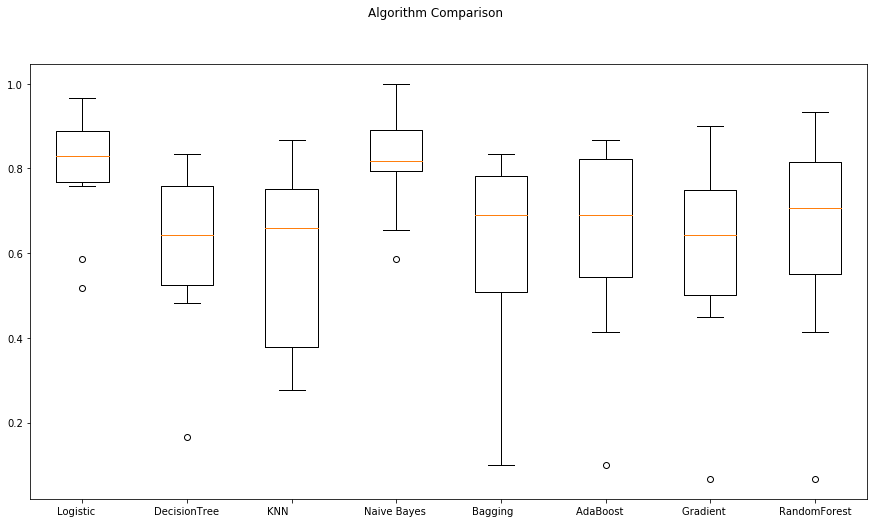

In [922]:
from sklearn import model_selection

models=[]

models.append(('Logistic    ',lr_model))
models.append(('DecisionTree',dt_model))
models.append(('KNN         ',kn_model))
models.append(('Naive Bayes ',nb_model))
models.append(('Bagging     ',bg_model))
models.append(('AdaBoost    ',bg_model))
models.append(('Gradient    ',gb_model))
models.append(('RandomForest',rf_model))

results=[]
names=[]

scoring='accuracy'

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=2)
    cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig=plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Even after all the ensemble techniques implemented. Logistic Regression is giving out the highest accuracy. But naive bayes is giving out accuracy near to logistic Regression and also with less variance.

### Naive Bayes model can be used.
